<a href="https://colab.research.google.com/github/poojabhore88-maker/Data_science_project/blob/main/pooja_cognifyz_level2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
COGNIFYZ level 2: TASK 1

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
print("Upload Dataset .csv file:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
print("Dataset Loaded Successfully!")

Upload Dataset .csv file:


Saving Dataset .csv to Dataset .csv
Saving Data Science.pdf to Data Science.pdf
Dataset Loaded Successfully!


In [ ]:
table_counts = df["Has Table booking"].value_counts()
table_percent = (table_counts / len(df)) * 100
print("\n Table Booking Availability (%):")
print(table_percent)


 Table Booking Availability (%):
Has Table booking
No     87.875615
Yes    12.124385
Name: count, dtype: float64


In [ ]:
delivery_counts = df["Has Online delivery"].value_counts()
delivery_percent = (delivery_counts / len(df)) * 100
print("\n Online Delivery Availability (%):")
print(delivery_percent)



 Online Delivery Availability (%):
Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64


In [ ]:
rating_booking = df.groupby("Has Table booking")["Aggregate rating"].mean()
print("\n Average Ratings (With/Without Table Booking):")
print(rating_booking)


 Average Ratings (With/Without Table Booking):
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


/tmp/ipython-input-2436753602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_booking.index, y=rating_booking.values, palette="viridis")


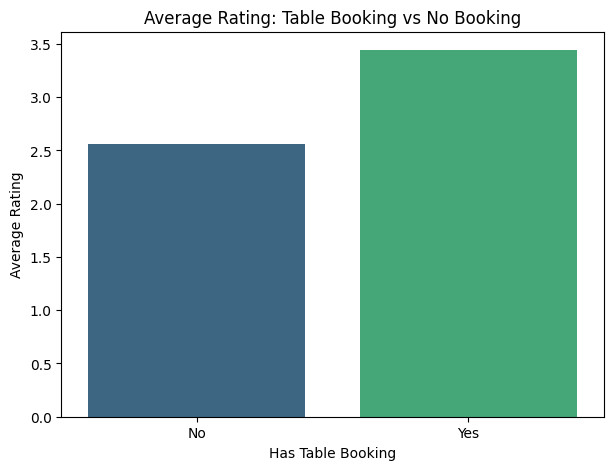

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=rating_booking.index, y=rating_booking.values, palette="viridis")
plt.title("Average Rating: Table Booking vs No Booking")
plt.ylabel("Average Rating")
plt.xlabel("Has Table Booking")
plt.show()


 Online Delivery Availability by Price Range (%):
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


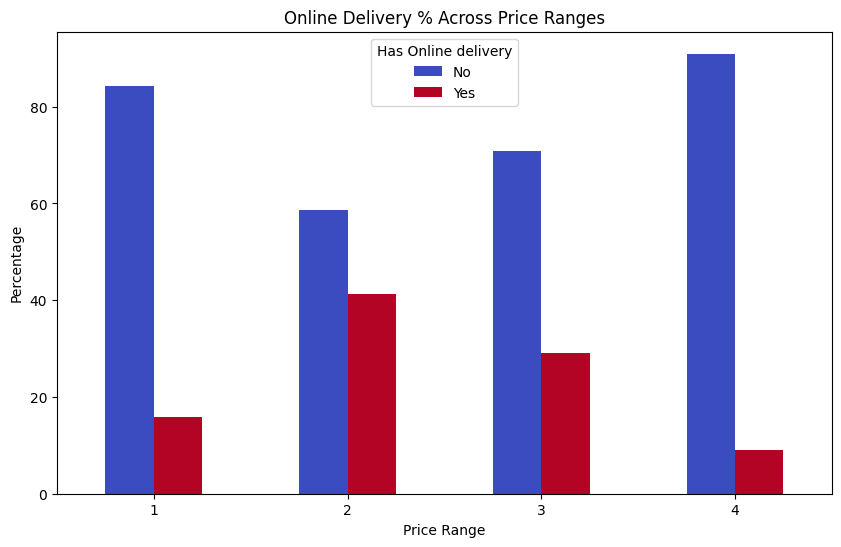

In [ ]:
delivery_price = df.groupby("Price range")["Has Online delivery"].value_counts(normalize=True).unstack() * 100
print("\n Online Delivery Availability by Price Range (%):")
print(delivery_price)

delivery_price.plot(kind="bar", figsize=(10,6), colormap="coolwarm")
plt.title("Online Delivery % Across Price Ranges")
plt.ylabel("Percentage")
plt.xlabel("Price Range")
plt.xticks(rotation=0)
plt.show()

LEVEL 2 :TASK 2


 Most Common Price Range:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


/tmp/ipython-input-2746779435.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Price range", data=df, palette="coolwarm")


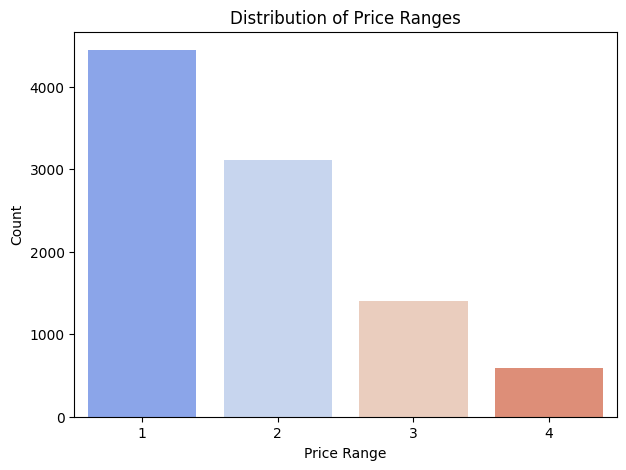

In [ ]:
price_counts = df["Price range"].value_counts()
print("\n Most Common Price Range:")
print(price_counts)

plt.figure(figsize=(7,5))
sns.countplot(x="Price range", data=df, palette="coolwarm")
plt.title("Distribution of Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()


 Average Rating for Each Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


/tmp/ipython-input-4202539641.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values, palette="viridis")


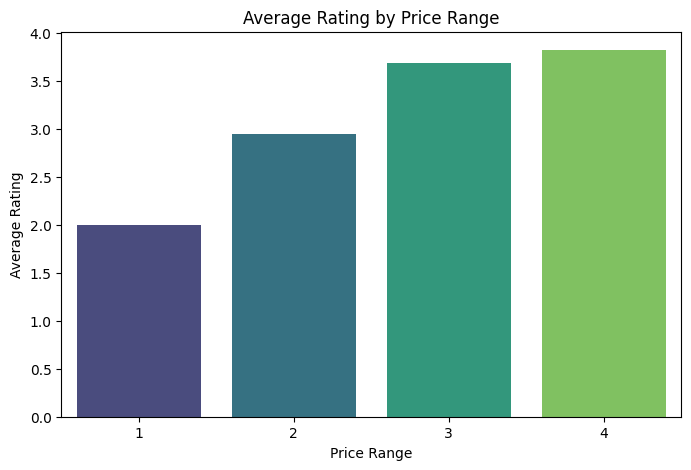

In [ ]:
avg_rating_by_price = df.groupby("Price range")["Aggregate rating"].mean()
print("\n Average Rating for Each Price Range:")
print(avg_rating_by_price)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values, palette="viridis")
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()


 Rating Color with Highest Average Rating:
Rating color
Dark Green    4.659801
Green         4.168119
Yellow        3.683429
Orange        3.051619
Red           2.297849
White         0.000000
Name: Aggregate rating, dtype: float64


/tmp/ipython-input-3750379570.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_color_avg.index, y=rating_color_avg.values, palette="Spectral")


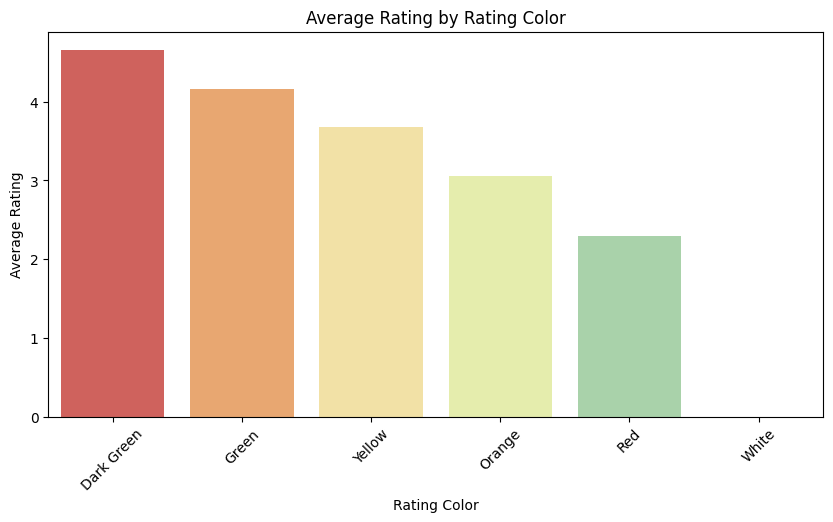

In [ ]:
rating_color_avg = df.groupby("Rating color")["Aggregate rating"].mean().sort_values(ascending=False)
print("\n Rating Color with Highest Average Rating:")
print(rating_color_avg)

plt.figure(figsize=(10,5))
sns.barplot(x=rating_color_avg.index, y=rating_color_avg.values, palette="Spectral")
plt.title("Average Rating by Rating Color")
plt.xlabel("Rating Color")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

LEVEL 2: TASK **3**

In [ ]:
df["Restaurant Name Length"] = df["Restaurant Name"].astype(str).apply(len)
df["Address Length"] = df["Address"].astype(str).apply(len)
df["Cuisine Count"] = df["Cuisines"].astype(str).apply(lambda x: len(x.split(',')))
df["Has Table Booking Encoded"] = df["Has Table booking"].apply(lambda x: 1 if str(x).strip().lower()=="yes" else 0)
df["Has Online Delivery Encoded"] = df["Has Online delivery"].apply(lambda x: 1 if str(x).strip().lower()=="yes" else 0)
df["High Rated"] = df["Aggregate rating"].apply(lambda x: 1 if x >= 4.0 else 0)
print("\n New Features Created:")
df[["Restaurant Name Length", "Address Length", "Cuisine Count",
    "Has Table Booking Encoded", "Has Online Delivery Encoded", "High Rated"]].head()



 New Features Created:


,Restaurant Name Length,Address Length,Cuisine Count,Has Table Booking Encoded,Has Online Delivery Encoded,High Rated
0,16,71,3,1,0,1
1,16,67,1,1,0,1
2,22,56,4,1,0,1
3,4,70,2,0,0,1
4,11,64,2,1,0,1


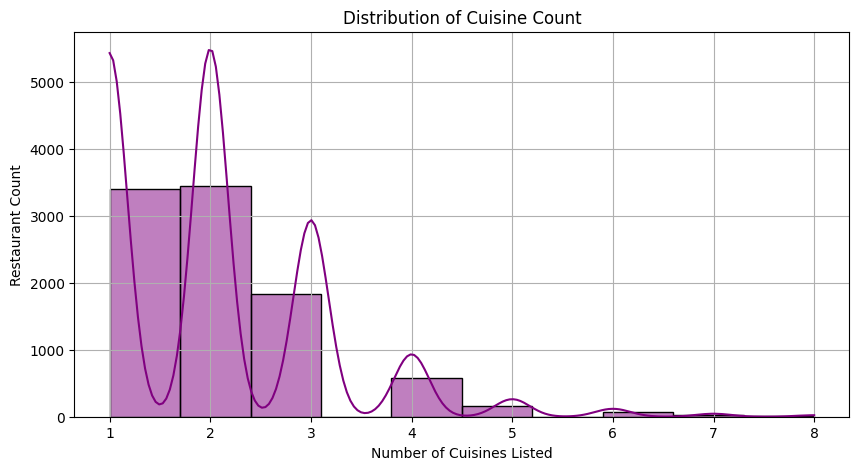

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["Cuisine Count"], bins=10, kde=True, color="purple")
plt.title("Distribution of Cuisine Count")
plt.xlabel("Number of Cuisines Listed")
plt.ylabel("Restaurant Count")
plt.grid(True)
plt.show()

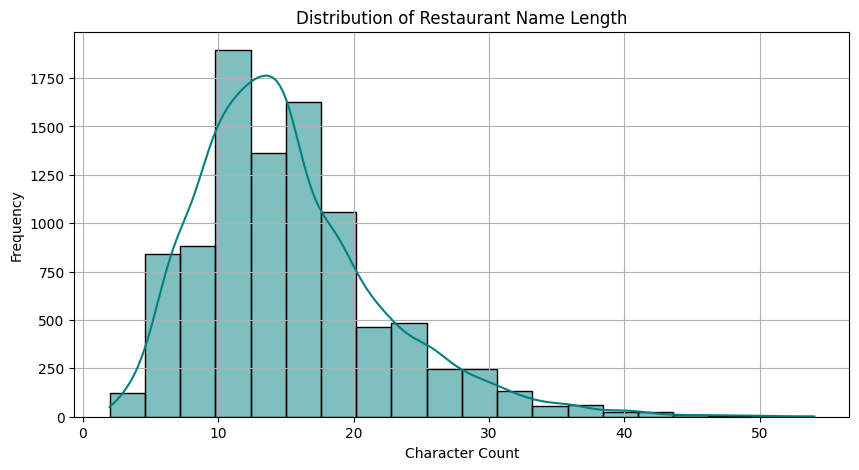

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["Restaurant Name Length"], bins=20, kde=True, color="teal")
plt.title("Distribution of Restaurant Name Length")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

/tmp/ipython-input-2103298200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="High Rated", data=df, palette="coolwarm")


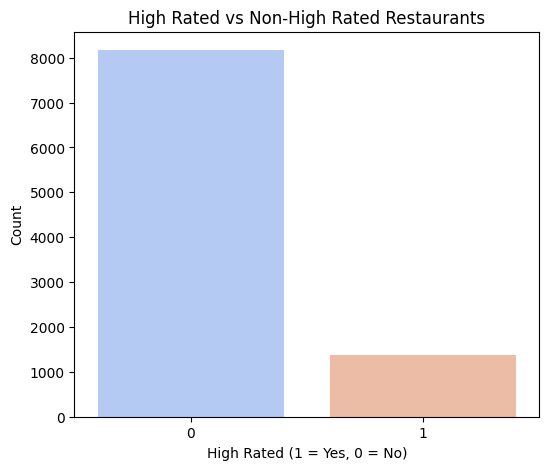

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x="High Rated", data=df, palette="coolwarm")
plt.title("High Rated vs Non-High Rated Restaurants")
plt.xlabel("High Rated (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

In [ ]:
df.to_csv("Dataset_with_Features.csv", index=False)
print("\n New engineered dataset saved as: Dataset_with_Features.csv")

files.download("Dataset_with_Features.csv")


 New engineered dataset saved as: Dataset_with_Features.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>